# Manipulations of the color palette

This code provides functions and examples on how to extract and modify the dominant color palette of an image. This code is based on [Color Thief](https://github.com/fengsp/color-thief-py). 

First, let's import the required functions and libraries that we are going to use in the code. 

In [1]:
import os
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from colorthief import ColorThief
from PIL import Image, UnidentifiedImageError

from palettes_maniputations import get_palette, extract_image_palettes, map_image_to_palette, image_recoloring
from utils import imshow

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


We define the path of the image to modify and the path of the directory where we will save the results.

In [2]:
img_dir = "images/" # Image directory
img_file = "nicholas-roerich_tent-mountain-1933.jpg" # Image file to modify
results_dir = "results/image_recoloring/color_palette/examples/" # Where to save the altered images
os.makedirs(results_dir, exist_ok=True) # Creates results_dir if it does not exist

Let's display the image.

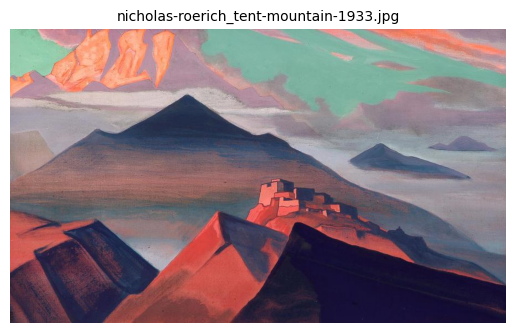

In [3]:
original_image = cv2.imread(img_dir + img_file)[:, :, ::-1]
imshow(original_image, img_file)

We define `n`, the dimension of the dominant color palette that we are going to extract. If `n` is small, the colors in the image will be represented by a small number of dominant colors. 

In [4]:
n = 5

Here, we extract and visualize the dominant color palette. 

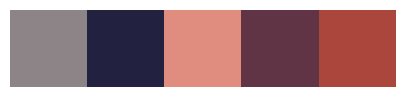

In [5]:
palette = extract_image_palettes(img_dir+img_file, results_dir, results_dir, n)
imshow(palette)

Let's map the pixels of the original image to the pixels of the extracted `n`-dimensional color palette.

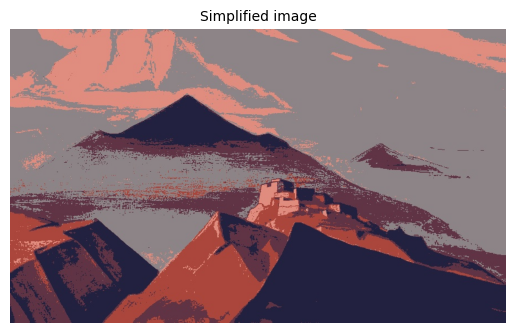

In [6]:
map_image_to_palette(img_dir+img_file, results_dir, n)
simplified_img_path = results_dir + img_file.replace(".jpg", f"_simplified_{n}d.jpg")
imshow(cv2.imread(simplified_img_path)[:, :, ::-1], "Simplified image")

Now, let's modify the painting by replacing its color palette with the palette of another painting. First, let's define and visualize the source of the new color palette. 

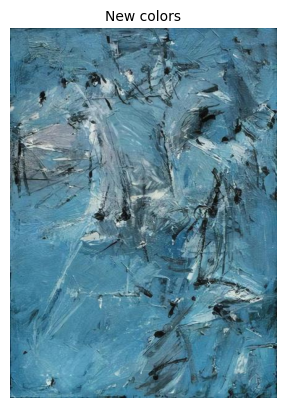

In [7]:
new_color_path = "images/adnan-coker_unknown-title(3).jpg"
imshow(cv2.imread(new_color_path)[:, :, ::-1], "New colors")

Let's recolor the original image and visualize the result. 

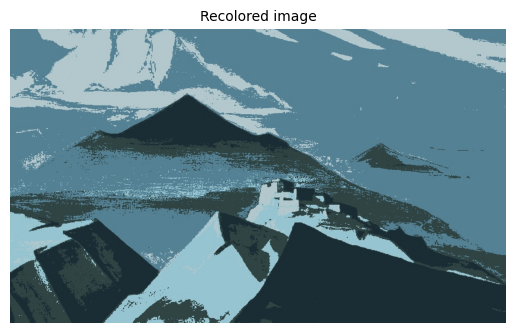

In [8]:
image_recoloring(img_dir+img_file, new_color_path, results_dir, n)
recolored_img_path = results_dir + img_file.replace(".jpg", f"_recolored_{n}d.jpg")
imshow(cv2.imread(recolored_img_path)[:, :, ::-1], "Recolored image")

If we increase `n`, we get more variety in the color palette. 

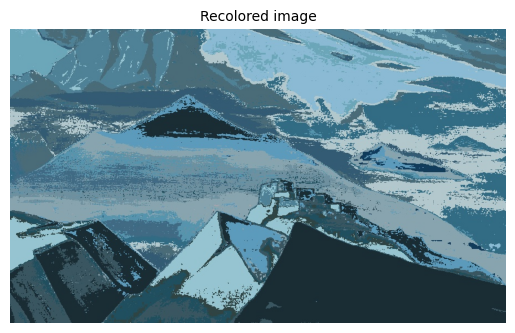

In [9]:
n = 20
image_recoloring(img_dir+img_file, new_color_path, results_dir, n)
recolored_img_path = results_dir + img_file.replace(".jpg", f"_recolored_{n}d.jpg")
imshow(cv2.imread(recolored_img_path)[:, :, ::-1], "Recolored image")